In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [114]:
y = df_encoded1["Status"].astype(int)
X = df_encoded1.drop(columns=["Status"])

In [115]:
print("Shape full:", X.shape, "| Target counts:", Counter(y))


Shape full: (148470, 33) | Target counts: Counter({0: 112031, 1: 36439})


In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [117]:
print("Train target counts BEFORE SMOTE:", Counter(y_train))
print("Test  target counts (unchanged): ", Counter(y_test))

Train target counts BEFORE SMOTE: Counter({0: 89625, 1: 29151})
Test  target counts (unchanged):  Counter({0: 22406, 1: 7288})


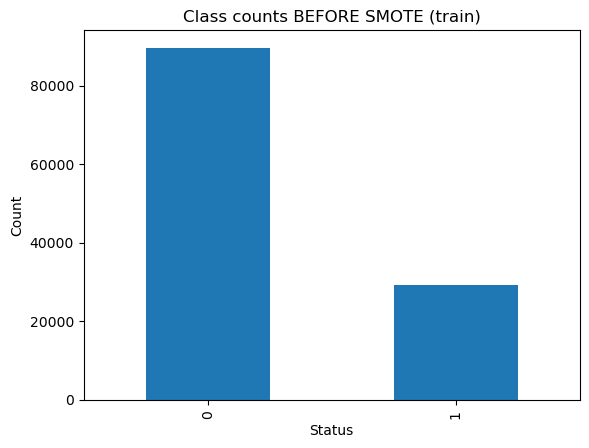

In [118]:
plt.figure()
pd.Series(y_train).value_counts().sort_index().plot(kind="bar")
plt.title("Class counts BEFORE SMOTE (train)")
plt.xlabel("Status"); plt.ylabel("Count")
plt.show()

In [119]:
sm = SMOTE(random_state=42, k_neighbors=5)   # reduce to 3 if very few minority samples
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [120]:
print("Train target counts AFTER  SMOTE:", Counter(y_train_sm))
print("X_train_sm shape:", X_train_sm.shape, "| X_test shape:", X_test.shape)

Train target counts AFTER  SMOTE: Counter({1: 89625, 0: 89625})
X_train_sm shape: (179250, 33) | X_test shape: (29694, 33)


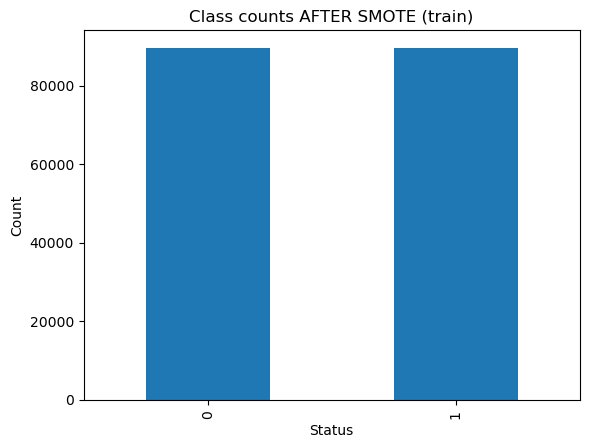

In [121]:
plt.figure()
pd.Series(y_train_sm).value_counts().sort_index().plot(kind="bar")
plt.title("Class counts AFTER SMOTE (train)")
plt.xlabel("Status"); plt.ylabel("Count")
plt.show()